## Getting Started
To prepare LibRealSense Python environment, follow the steps below:

- Download [PyCharm](https://www.jetbrains.com/pycharm/download/#section=windows) tool to run Python code
- Download [Python 3.9](https://www.python.org/downloads/release/python-395/) or [Python 3.7](https://www.python.org/downloads/release/python-379/)
- Download [get-pip.py](https://bootstrap.pypa.io/get-pip.py) and run the following commands in PyCharm terminal: 
    - ***python get-pip.py*** 
    - ***pip install pyrealsense2***
    - ***pip install numpy***
    - ***pip install matplotlib***
    - ***pip install opencv-python***
<p align="left"><img src="images/pyrealsense2.png" width="40%" /><br><br></p>
    

In [10]:
import os
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment is Ready")

Environment is Ready


## Find RealSense Devices

In [11]:
print("Connected Devices:")
devices = []
for d in rs.context().devices:
    if d.get_info(rs.camera_info.name).lower() != 'platform camera':
        devices.append(d)
        print(d.get_info(rs.camera_info.name))
        d.get_info(rs.camera_info.serial_number)
if not devices:
    print("No RealSense device was detected")

Connected Devices:
Intel RealSense D435I


## Find Depth and RGB Sensors

In [12]:
rgb_sensor = depth_sensor = None
for device in devices:
    print("Available sensors in device:", d.get_info(rs.camera_info.name))
    for s in device.sensors:
        if s.get_info(rs.camera_info.name) == 'RGB Camera':
            print(" - found RGB sensor")
            rgb_sensor = s
        if s.get_info(rs.camera_info.name) == 'Stereo Module':
            depth_sensor = s
            print(" - found Depth sensor")
    if not rgb_sensor:
        print("The demo requires Depth camera with Color sensor")
        exit(0)

Available sensors in device: Intel RealSense D435I
 - found Depth sensor
 - found RGB sensor


## Configure Sensor for Streaming

In [13]:
# Setup:
path = str(os.environ['USERPROFILE']+'\.jupyter\downloads\quick_start.bag')
pipe = rs.pipeline()
cfg = rs.config()
cfg.enable_device_from_file(path)
profile = pipe.start(cfg)
print("Sensor is configured")

Sensor is configured


## Displaying Depth and Color Frames

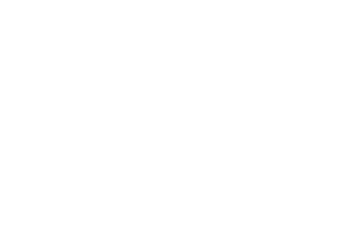

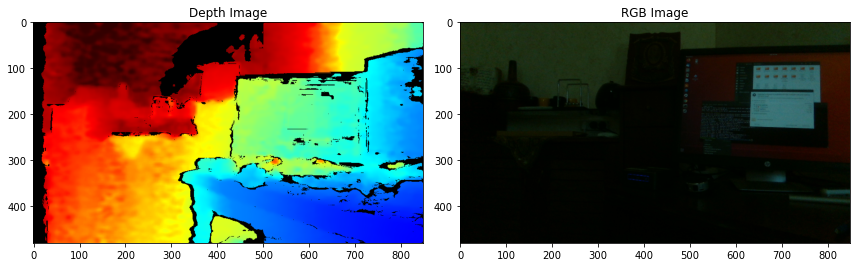

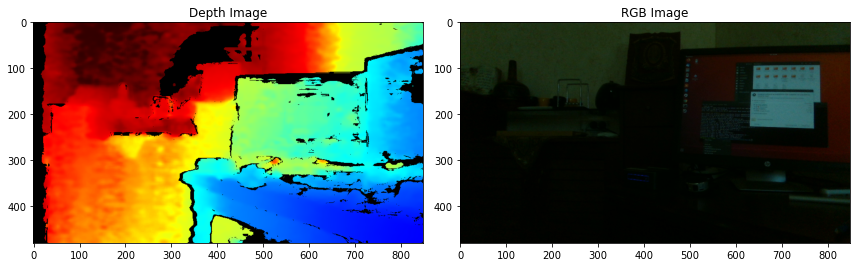

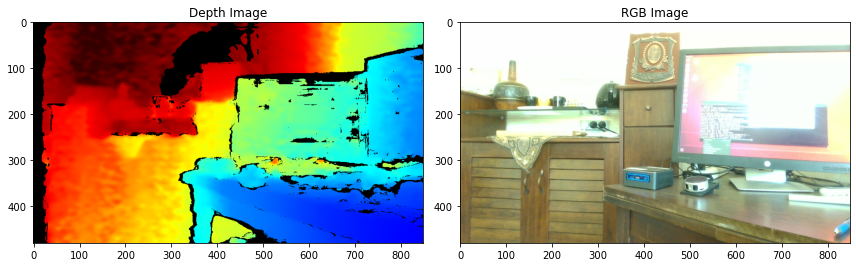

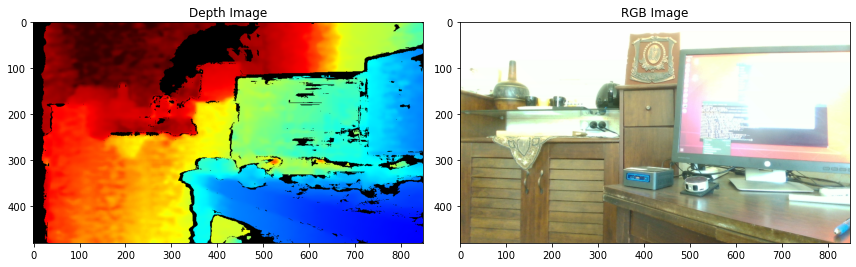

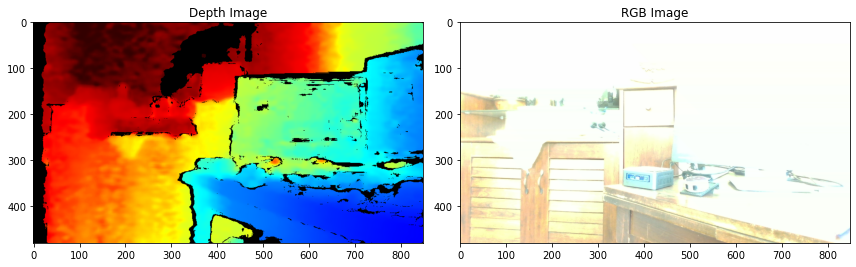

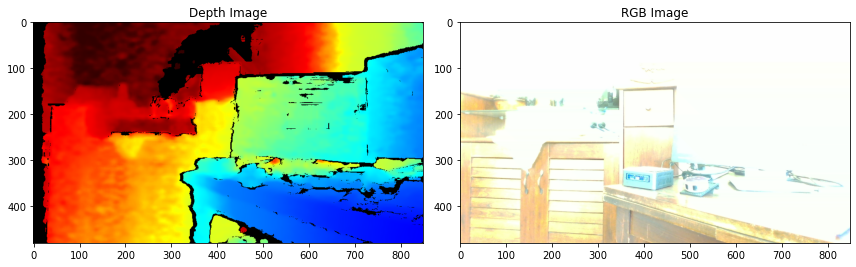

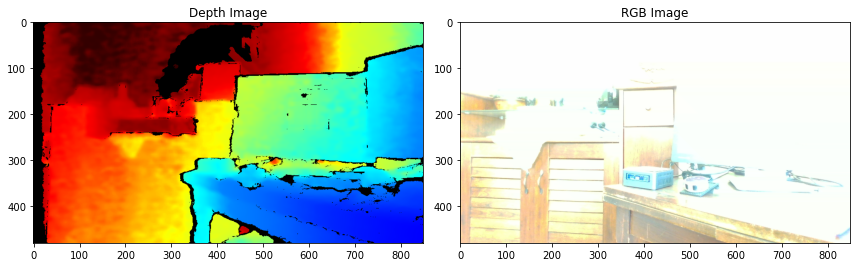

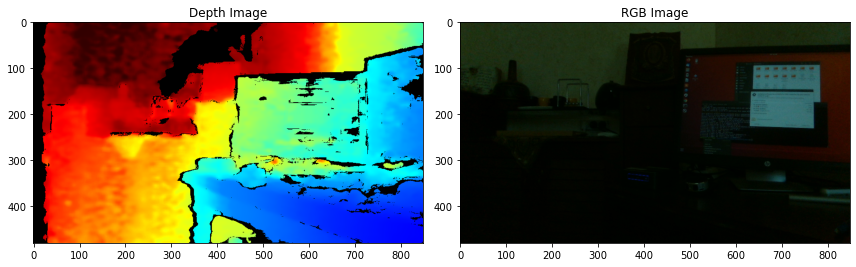

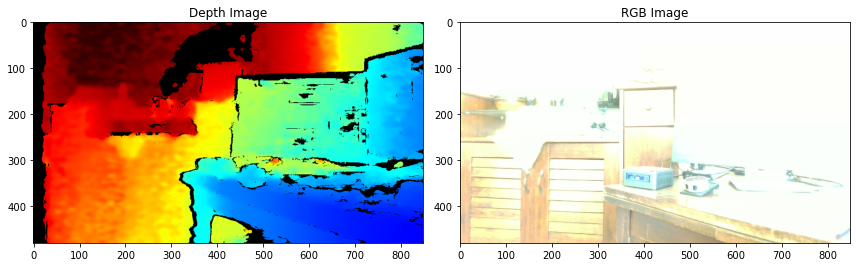

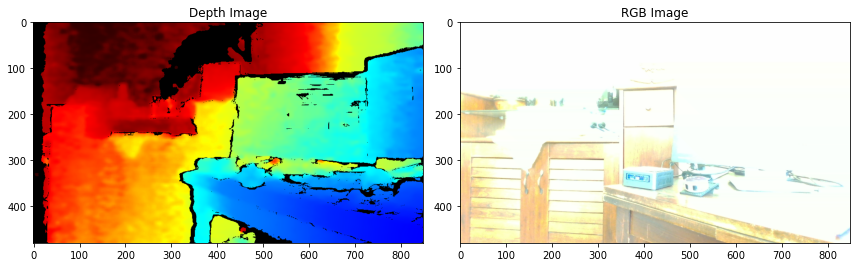

Done!


In [15]:
colorizer = rs.colorizer()

# Start pipe streaming
profile = pipe.start(cfg)

# config display
plt.rcParams["axes.grid"] = False
plt.axis('off')
title = ["Depth Image", "RGB Image"]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

for _ in range(10):
    # Store next frameset for processing:
    frameset = pipe.wait_for_frames()
    depth_frame = frameset.get_depth_frame()
    color_frame = frameset.get_color_frame()
    colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
    colorized_color = np.asanyarray(colorizer.colorize(color_frame).get_data())
    arr = [colorized_depth, colorized_color]
    
    for i, ax in enumerate(axs.flatten()):
        plt.sca(ax)
        plt.imshow(arr[i])
        plt.title(title[i])
        
    plt.tight_layout()
    plt.show()
    plt.pause(0.01)

# Cleanup:
pipe.stop()
print("Done!")

## RGB Exposure and Depth Laser Power Controls

In [141]:
if rgb_sensor.supports(rs.option.exposure) :
    print(rgb_sensor.get_option(rs.option.exposure))
    rgb_sensor.set_option(rs.option.exposure, 1000)
    print(rgb_sensor.get_option(rs.option.exposure))
    
if depth_sensor.supports(rs.option.laser_power) :
    print(depth_sensor.get_option(rs.option.laser_power))
    depth_sensor.set_option(rs.option.laser_power, 5)
    print(depth_sensor.get_option(rs.option.laser_power))

print("Done!")

9.0
1250.0
5.0
5.0
Done!
